# Prática I - Redes Neurais usando Python

# Parte 1 - Construindo uma rede do zero

Redes Neurais constituem uma das técnicas mais populares de Inteligência Computacional. Por mais que esta técnica tenha um potencial para mapeamento de diversos problemas, o conceito básico sobre o seu funcionamento não é impossível de ser entendido.

Nesta primeira parte prática, iremos construir uma Rede Neural do zero. Para uma forma didática, a primeira etapa vai abordar os principais aspectos de Redes Neurais. 

Resolva primeiro a parte teórica do item para resolver em seguida a parte prática.


O esqueleto do modelo de Rede Neural já está pronto. Para uma melhor comodidade, o script já possui os métodos essenciais para o funcionamento, mas os códigos ainda não estão implementados. O objetivo deste trabalho é desenvolver o conhecimento teórico e prático sobre redes neurais, entendendo mais a fundo as suas operações.

In [ ]:
from google.colab import drive 
import os 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/mdrs-thiago/PUC_Redes_Neurais

Cloning into 'PUC_Redes_Neurais'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 131 (delta 16), reused 125 (delta 10), pack-reused 0
Receiving objects: 100% (131/131), 2.00 MiB | 11.13 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class NeuralNetwork():
    def __init__(self,nin,nout,hidden_neurons=[2],hidden_layers=1,activation=['relu']):
        '''
        Classe para a implementação do algoritmo de Redes Neurais para a atividade prática da disciplina Inteligência Computacional Aplicada - PUC-Rio
        
        Variáveis de entrada:
        nin - Quantidade de entradas da Rede (int)
        nout - Quantidade de neurônios na saída da Rede (int)
        hidden_neurons - Quantidade de neurônios na camada escondida. Deve ser uma lista de inteiros positivos.
        hidden_layers - Quantidade de camadas escondidas. (int)
        activation - Função de ativação para cada uma das camadas. Deve ser uma lista de strings.
        
        '''
        
        #Entrada do modelo
        self.input = nin 
        #Saída do modelo
        self.output = nout 
        #Lista de neurônios. Começa a contagem da entrada do modelo.
        self.hn = [nin] + hidden_neurons 
        
        self.hl = hidden_layers

        #Dicionário com todas as possíveis funções de ativação. Caso construa alguma outra, adicione a esta lista.
        self.possible_activations = {'relu':self.relu, 'tanh':np.tanh, 'sigmoid':self.sigmoid}

        #Inicialização dos pesos ao criar o novo objeto
        self.initialize_weights(activation)




    def initialize_weights(self,activation):

        #Matriz de pesos 
        self.weights = dict()
        #Vetor de bias
        self.bias = dict()

        #Erros
        self.weights_error = dict()
        self.bias_error = dict()

        #Ativacao do neuronio
        self.neuron_out = dict()
        
        
        self.neuron_net = dict()

        self.activation = dict()




        for i in range(self.hl):
            name = f'hidden{i}'

            self.weights[name] = np.random.rand(self.hn[i+1], self.hn[i])*2 - 1.0
            self.bias[name] = np.zeros((self.hn[i+1],1))

            self.weights_error[name] = np.zeros((self.hn[i+1], self.hn[i]))
            self.bias_error[name] = np.zeros((self.hn[i+1],1))

            self.activation[name] = self.possible_activations[activation[i]]

            self.neuron_out[name] = np.zeros((self.hn[i+1],1))
            self.neuron_net[name] = np.zeros((self.hn[i], 1))


        self.weights['output'] = np.random.rand(self.output, self.hn[-1])*2 - 1.0
        self.bias['output'] = np.zeros((self.output, 1))

        self.weights_error['output'] = np.zeros((self.output, self.hn[-1]))
        self.bias_error['output'] = np.zeros((self.output,1))

        self.activation['output'] = self.possible_activations[activation[-1]]

        self.neuron_out['output'] = np.zeros((self.output,1))

        self.neuron_net['output'] = np.zeros((self.hn[-1],1))

    def insert_layers(self,weights=[],bias=[]):
        '''
        Função para inserção manual dos pesos. 
        '''
        self.weights = weights
        self.bias = bias 

    def neuron_process(self,x=[],weights=[],bias=[]):
        '''
        Função para regra de propagação
        '''
        return np.dot(weights,x) + bias


    def forward(self,x):
        '''
        Função para etapa feedforward
        '''
        input_values = x
        for layer in self.weights:

            self.neuron_net[layer] = np.copy(input_values)

            A = self.neuron_process(x=input_values,weights=self.weights[layer],bias=self.bias[layer])
            self.neuron_out[layer] = self.activation[layer](A)
            
            input_values = self.activation[layer](A)

        return self.activation['output'](A)


    def backward(self,lr,y):
        '''
        Função para a etapa feedback
        '''
        for layer in reversed(self.weights):

            if layer == 'output':
                # (sj - tj)
                dZ2 = y - self.neuron_out[layer]
                #Atualizacao de W 
                dW2 = np.dot(dZ2, self.neuron_net[layer].T)
                #Atualizacao de bias
                db2 = np.sum(dZ2, axis=1, keepdims=True)
                
                
                self.weights_error[layer] = lr * dW2 
                self.bias_error[layer] = lr * db2 
                prev_weights = self.weights[layer]
            else:
                #Erro na camada intermediaria                        F'(net) -> função tanh
                dZ1 = np.multiply(np.dot(prev_weights.T, dZ2), 1-np.power(self.neuron_out[layer], 2))
                
                
                dW1 = np.dot(dZ1, self.neuron_net[layer].T)
                
                db1 = np.sum(dZ1, axis=1, keepdims=True)
                self.weights_error[layer] = lr * dW1 
                self.bias_error[layer] = lr * db1 

                prev_weights = self.weights[layer]
                dZ2 = np.copy(dZ1)
            

    def update_weights(self):
        '''
        Função para atualização dos pesos
        '''
        for layer in self.weights:

            assert(self.weights[layer].shape == self.weights_error[layer].shape), f"Dimension mismatch: {self.weights[layer].shape} and {self.weights_error[layer].shape}"
            self.weights[layer] = self.weights[layer] + self.weights_error[layer]

            assert(self.bias[layer].shape == self.bias_error[layer].shape), f"Dimension mismatch: {self.bias[layer].shape} and {self.bias_error[layer].shape}"
            self.bias[layer] = self.bias[layer] + self.bias_error[layer]
            self.weights_error[layer] = np.zeros(self.weights_error[layer].shape)
            self.bias_error[layer] = np.zeros(self.bias_error[layer].shape)

    def train(self,x,y,epochs=100,lr=0.5):
        '''
        Função para treinamento da rede
        '''
        for epoch in range(epochs):
            out = self.forward(x)

            self.backward(lr,y)
            
            self.update_weights()



    @staticmethod
    def sigmoid(x):
        '''
        Definição da função sigmoide. Retorna o valor 1/(1 + e^(-x))
        '''
        sigm = 1/(1 + np.exp(-x))
        return sigm

    
    def sigmoid_derivative(self,value):
        '''
        ???
        '''
        return self.sigmoid(value)*(1-self.sigmoid(value))

    @staticmethod
    def relu(x):
        return np.maximum(np.zeros(x.shape),x)

    @staticmethod 
    def relu_derivative(x):
        return np.ones(x.shape)

### Questão 1
O neurônio é a unidade básica de uma Rede Neural. Na primeira etapa, desenvolva dentro da função **neuron_process** para o cálculo de processamento do neurônio. Não esqueça que a função recebe como argumento a matriz de pesos **weights**, a entrada **x** e o bias **bias**.

Ao terminar de implementar a função, valide seu código com os testes abaixo. **Não** prossiga para o próximo item enquanto houver erro no resultado.

In [ ]:
nn_test = NeuralNetwork(2,1,hidden_layers=1,hidden_neurons=[4],activation=['tanh','sigmoid'])

In [ ]:
x = np.array([[0],[0]])
weights = np.array([[ 3.14708825, -3.02515284],[-3.48236268,  3.60001384]])
bias = np.array([[1.43813902],[1.67767442]])

nn_test.neuron_process(x=x,weights=weights,bias=bias)

array([[1.43813902],
       [1.67767442]])

### Questão 2
Com a código de processamento do neurônio já criado, é preciso desenvolver um método para a função de ativação não-linear. 
Desenvolva a equação que representa a ativação sigmoide e sua respectiva derivada. Para validar o funcionamento, além de realizar os testes padrões estipulados abaixo, verifique graficamente se as funções estão de acordo com o esperado.

In [ ]:
t = np.linspace(-10,10,100)

Text(0, 0.5, 'sigm(x)')

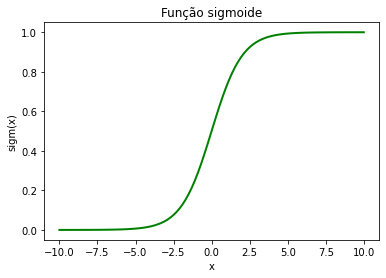

In [ ]:
plt.plot(t,nn_test.sigmoid(t),linewidth=2,color='g')
plt.title('Função sigmoide')
plt.xlabel('x')
plt.ylabel('sigm(x)')

### Etapa III - Feedforward

### Etapa IV - Retropropagação dos erros

### Etapa V - Atualização dos pesos

### Etapa VI - Treinamento do modelo

In [ ]:
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]])

#X = np.array([[0,0],[0,1],[1,0],[1,1]])
#Y = np.array([[0],[1],[1],[0]])

nn_test.train(X,Y,epochs=1500,lr=0.2)

### Etapa VII - Generalização

In [ ]:
X_test = np.array([[0],[0]])
print(nn_test.forward(X_test))

X_test = np.array([[0],[1]])
print(nn_test.forward(X_test))

X_test = np.array([[1],[0]])
print(nn_test.forward(X_test))

X_test = np.array([[1],[1]])
print(nn_test.forward(X_test))

[[0.00030853]]
[[0.99744658]]
[[0.99772362]]
[[0.0030284]]


In [ ]:
nn_test.bias

{'hidden0': array([[-0.93541997],
        [-0.30522097],
        [ 1.12782389],
        [-0.32628317]]),
 'output': array([[2.37573173]])}

In [ ]:
manual_weights = dict()
manual_bias = dict()
manual_weights['hidden0'] = np.array([[ 3.14708825, -3.02515284],
        [-3.48236268,  3.60001384]])
manual_weights['output'] = np.array([[-5.07678577, -5.01607987]])

manual_bias['hidden0'] = np.array([[1.43813902],
        [1.67767442]])
manual_bias['output'] = np.array([[4.49745273]])

nn_test.insert_layers(weights=manual_weights,bias=manual_bias)

In [ ]:
nn_test.weights

{'hidden0': array([[ 3.14708825, -3.02515284],
        [-3.48236268,  3.60001384]]),
 'output': array([[-5.07678577, -5.01607987]])}

In [ ]:
nn_test.neuron_out

{'hidden0': array([[-0.97217686],
        [ 0.99980005],
        [ 0.97393905],
        [ 0.53319081]]),
 'output': array([[0.0030284]])}

# Parte 2 - Framework para Redes Neurais


In [ ]:
import torch
import torch.nn as nn   #Definicao da rede neural
from torch.utils.data import Dataset, DataLoader  #utilidade para dataset

from tqdm.notebook import tqdm

from sklearn.model_selection import cross_val_score, KFold, train_test_split

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris

In [ ]:
#Função necessária para criar um custom dataset no Pytorch
class CustomDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


## Dataset e pré-processamento

Neste exemplo, iremos usar o dataset Iris. É um problema bastante conhecido na área de Ciência de Dados.
A base de dados possui 150 registros e 4 atributos, com informações de comprimento e largura de suas pétalas e sépalas. No total, temos 50 amostras para cada uma das três classes: Iris-Setosa, Iris-Verginica e Iris-Versicolor

In [ ]:
data = load_iris()

In [ ]:
X = data.data
target = data.target

In [ ]:
#['bad','good'] -> [0, 1]

#[1, 2, 3, 4, 5] -> [0, 1, 2, 3, 4]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(target)

In [ ]:
#Definindo o conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.5,random_state=42)

In [ ]:
#Normalização dos dados
scaler = MinMaxScaler()                   #(x - x_min)/(x_max - x_min) ~ [0,1] 

X_train = scaler.fit_transform(X_train)   # x_min_train, x_max_train.
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Ajustando o dataset e definindo o DataLoader para o treinamento do modelo.

Lembrete: Dependendo do tipo de problema, devemos adequar o tipo das variáveis. No exemplo abaixo, estamos adequando as variáveis X_train, X_val e X_test do tipo double para float. Em alguns casos (especialmente em problemas com múltiplas classes), temos que adequar as saídas desejadas para o tipo long.

In [ ]:
train_dataset = CustomDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train))
val_dataset = CustomDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val))
test_dataset = CustomDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test))

In [ ]:
#@title Definindo dataloader
batch_size = 16 
#Gerando um dataloader
train_loader = DataLoader(dataset=train_dataset,batch_size=batch_size)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

Temos algumas formas para criar um modelo de Redes Neurais em Pytorch.

In [ ]:
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
#Criar usando classe. 

class NeuralNetwork(torch.nn.Module):

  def __init__(self,hidden_neurons = 4, hidden_activation = 'relu', output_activation='softmax', n_input = 1, n_output = 1):
    # create model
    super(NeuralNetwork, self).__init__()

    self.activations = {'relu': nn.ReLU(), 'sigmoid':nn.Sigmoid(), 'softmax':nn.Softmax()}

    self.fc1 = nn.Linear(n_input, hidden_neurons)
    #self.ha = self.activations[hidden_activation]
    self.ha = nn.Sigmoid()
    self.fc2 = nn.Linear(hidden_neurons, n_output)
    #self.out = self.activations[output_activation]

  def forward(self,x):
    net = self.fc1(x)
    h1 = self.ha(net)
    y = self.fc2(h1) 
    #y = self.out(h2)
    return y

In [ ]:
model = NeuralNetwork(hidden_neurons=5, n_input=4, n_output=3)

In [ ]:
#@title Definindo parâmetros do problema.
lr = 10e-4 #@param {type:"number"}
device = 'cuda' #@param {type:"string"}

In [ ]:
model.parameters()

<generator object Module.parameters at 0x7f92a665d750>

In [ ]:
#@title Definindo a função de perda e o método de otimização para atualização dos pesos.

criterion = nn.CrossEntropyLoss() #Logits
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

history = {'acc_train' : [], 'loss_train': [], 'acc_val': [], 'loss_val': []}

In [ ]:
model = NeuralNetwork(hidden_neurons=5, n_input=4, n_output=3)

## Treinamento

Neste caso, definimos um loop para o treinamento por *n_epochs* épocas. Neste caso, não estamos usando o "offline learning", ensinado em sala de aula, mas sim um aprendizado em lote (batch).

In [ ]:
n_epochs=1000
loss_list=[]

#n_epochs

model.train() 

for epoch in range(n_epochs):
    #Treinamento em batch
    for x, y in train_loader:

        optimizer.zero_grad()
        y_hat = model(x)

        loss = criterion(y_hat,y)
        loss.backward()

        optimizer.step()
        
        loss_list.append(loss.data)
        
    
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 1.098142147064209
epoch 1, loss 1.0937440395355225
epoch 2, loss 1.0894551277160645
epoch 3, loss 1.0853015184402466
epoch 4, loss 1.0812479257583618
epoch 5, loss 1.077285647392273
epoch 6, loss 1.0734081268310547
epoch 7, loss 1.069599986076355
epoch 8, loss 1.0658440589904785
epoch 9, loss 1.0621247291564941
epoch 10, loss 1.0584286451339722
epoch 11, loss 1.0547409057617188
epoch 12, loss 1.0510480403900146
epoch 13, loss 1.0473369359970093
epoch 14, loss 1.0435956716537476
epoch 15, loss 1.0398132801055908
epoch 16, loss 1.0359784364700317
epoch 17, loss 1.0320795774459839
epoch 18, loss 1.0281100273132324
epoch 19, loss 1.024064064025879
epoch 20, loss 1.0199368000030518
epoch 21, loss 1.0157244205474854
epoch 22, loss 1.011422872543335
epoch 23, loss 1.0070297718048096
epoch 24, loss 1.0025438070297241
epoch 25, loss 0.9979626536369324
epoch 26, loss 0.9932973980903625
epoch 27, loss 0.9885401725769043
epoch 28, loss 0.983689546585083
epoch 29, loss 0.9787457585334

## Avaliação do modelo

Vamos agora avaliar o modelo treinado. Para isso, mudamos o modelo para o "modo" eval. Além disso, usamos o torch.no_grad(), para que a execução do trecho de código tenha o autograd engine desativado. 

Lembrete: Caso queira continuar o treinamento do modelo, é necessário usar o comando model.train()

In [ ]:
model.eval()
with torch.no_grad():
  X_test_torch = torch.from_numpy(X_test).float()
  y_hat = model(X_test_torch)
  y_ = torch.argmax(y_hat.data,dim = 1).numpy()

## Métricas de avaliação para classificação

In [ ]:
print(classification_report(y_test, y_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
cm = confusion_matrix(y_test, y_)

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

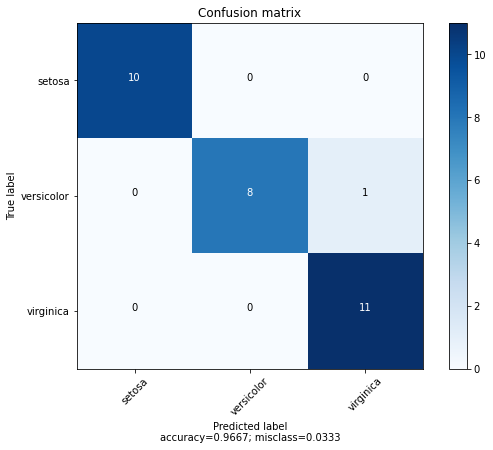

In [ ]:
plot_confusion_matrix(cm, data.target_names)

In [ ]:
#@title Forma "elegante" para mostrar a evolução do treinamento.

epochs = 50
for e in tqdm(range(1, epochs+1)):
  
  y_hat = np.array([])

  train_epoch_loss = 0
  train_epoch_acc = 0
  model.train()
  for X_train_batch, y_train_batch in train_loader:
      X, y = X_train_batch.to(device), y_train_batch.to(device)
      optimizer.zero_grad()
      
      y_pred = model(X)
      
      loss = criterion(y_pred, y)
      acc = accuracy(y_pred, y)
      
      loss.backward()
      optimizer.step()
      
      train_epoch_loss += loss.item()
      train_epoch_acc += acc.item()
      y_p = torch.argmax(y_pred, dim=1)
      y_hat = np.concatenate((y_hat, y_p))
  
  _, val_loss, val_acc = evaluate(model, val_loader, criterion, device, binary=binary)

  history['acc_train'].append(train_epoch_acc)
  history['loss_train'].append(train_epoch_loss)
  history['acc_val'].append(val_acc)
  history['loss_val'].append(val_loss)
  
  print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.3f} | Val Loss: {val_loss/len(val_loader):.4f} | Train Acc: {train_epoch_acc/len(train_loader):.4f}| Val Acc: {val_acc/len(val_loader):.4f}')
